In [169]:
# Import necessary tools
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [170]:
#Import the dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [171]:
#View the dataset
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [172]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [173]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [174]:
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data['MEDV'] = boston.target

In [175]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [176]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 我稍微設想了波士頓人買房時會考慮到什麼比較明顯的因素，如:
*  CRIM (犯罪率)
*  NOX (空汙指標:一氧化氮)
*  RM (每間房子平均房間數)
*  DIS (離五間就業中心的距離)
*  RAD (可否使用高速公路)
*  PTRATIO (師生比，可反映教育品質)

### 於是我選用這六個指標來預測房屋價錢。

In [177]:
# Import more necessary tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [178]:
# 先提取我們需要的資料
reg_data = data[['CRIM','NOX','RM','DIS','RAD','PTRATIO','MEDV']]
reg_data

,CRIM,NOX,RM,DIS,RAD,PTRATIO,MEDV
0,0.00632,0.538,6.575,4.0900,1.0,15.3,24.0
1,0.02731,0.469,6.421,4.9671,2.0,17.8,21.6
2,0.02729,0.469,7.185,4.9671,2.0,17.8,34.7
3,0.03237,0.458,6.998,6.0622,3.0,18.7,33.4
4,0.06905,0.458,7.147,6.0622,3.0,18.7,36.2
...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,2.4786,1.0,21.0,22.4
502,0.04527,0.573,6.120,2.2875,1.0,21.0,20.6
503,0.06076,0.573,6.976,2.1675,1.0,21.0,23.9
504,0.10959,0.573,6.794,2.3889,1.0,21.0,22.0


In [179]:
X = reg_data.loc[:, 'CRIM':'PTRATIO'].values
Y = reg_data.MEDV

In [180]:
#分割資料
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [181]:
#訓練模型
model = LinearRegression(normalize = True)
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [182]:
#使用訓練好的模型預測測試資料
Y_predict = model.predict(X_test)

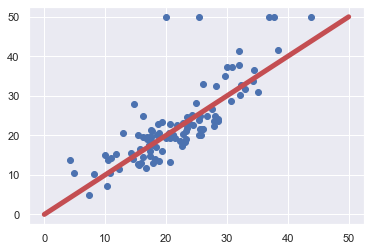

In [183]:
# Y_test對Y_predict作圖
sns.set()
plt.scatter(Y_predict, Y_test)
plt.plot([0,50],[0,50], c = 'r', lw = 5)

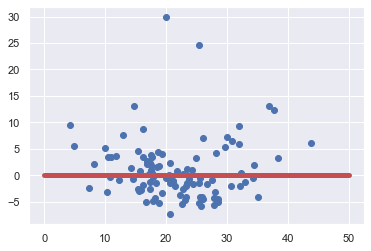

In [184]:
# Residual Plot
plt.scatter(Y_predict, Y_test-Y_predict)
plt.plot([0,50],[0,0], c = 'r', lw = 5)

In [191]:
print(f"R-squared: {model.score(X_test, Y_test)}")

R-squared: 0.63031639060115
